# Câu 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from numpy.linalg import inv
from numpy.linalg import det
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore")


1 Dimension detected
x= [0.5]


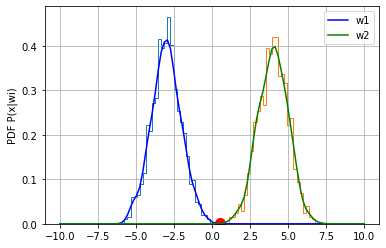

In [2]:
class Case1:
    def __init__(self,mu1,sigma1,n1,mu2,sigma2,n2):
        self.mu1 = mu1
        self.sigma1 = sigma1
        self.p1 = n1/(n1+n2)
        self.mu2 = mu2
        self.sigma2 = sigma2
        self.p2 = n2/(n1+n2)
        if(sigma1.shape[0] == 2):
            self.check = False
            self.w1 = np.random.multivariate_normal(mu1, sigma1, n1).T
            self.w2 = np.random.multivariate_normal(mu2, sigma2, n2).T
        else:
            print("1 Dimension detected")
            self.check = True
            self.w1 = np.random.normal(mu1, sigma1, 1000).T
            self.w2 = np.random.normal(mu2, sigma2, 1000).T
        
    # hàm cal_1D này dùng để tính case1 ở trường hợp 1 chiều
    def cal_1D(self):
        w1 = self.mu1/(self.sigma1**2)
        w2 = self.mu2/(self.sigma2**2)
        w10 = -self.mu1**2/(2*self.sigma1**2) + np.log(self.p1)
        w20 = -self.mu2**2/(2*self.sigma2**2) + np.log(self.p2)
        return -(w10 - w20) / (w1 - w2)

    # hàm cal_2D này dùng để tính case1 ở trường hợp 2 chiều
    def cal_2D(self):
        w = (self.mu1 - self.mu2)
        w1 = self.mu1/(np.cov(self.sigma1**2))
        w2 = self.mu2/(np.cov(self.sigma2**2))
        w10 = -self.mu1**2/(np.cov(self.sigma1**2)*2) + np.log(self.p1)
        w20 = -self.mu2**2/(np.cov(self.sigma2**2)*2) + np.log(self.p2)
        x = - (w10 - w20) / (w1 - w2)
        return w, x[0]

    # hàm fx trả về y là 1 phương trình đường thẳng cho bài toán 2 chiều
    def fx(self,x):
        w, x0 = self.cal_2D()
        a = w.T
        b = -w.T*x0
        return a*x + b

    # hàm visualize dùng để trực quan hóa dữ liệu cho 1 chiều và vẽ điểm biên
    def visualize(self):
        if(self.check == False):
            print("2 chiều không thể dùng hàm này")
            return
        n1, X1 , _ = plt.hist(self.w1, bins=np.linspace(-10, 10, 100),
        histtype=u'step', density=True)
        n2, X2, _ = plt.hist(self.w2, bins=np.linspace(-10, 10, 100),
        histtype=u'step', density=True)
        density1 = stats.gaussian_kde(self.w1)
        density2 = stats.gaussian_kde(self.w2)
        plt.plot(X1, density1(X1),color = 'blue', label = 'w1')
        plt.plot(X2, density2(X2),color ='green',label = 'w2')
        print('x=', self.cal_1D())
        plt.scatter(self.cal_1D(),y=0.001, s= 100, marker = 'o', c = 'red')
        plt.ylabel('PDF P(x|wi)')
        plt.grid()
        plt.legend()

    # hàm visualize_fx dùng để trực quan hóa cho dữ liệu 2 chiều và vẽ đường fx
    def visualize_fx(self):
        if(self.check == True):
            print("1 chiều không thể dùng hàm này")
            return
        print("f(x) = a*x + b với a = w.T*x và b là -w.T*x0")
        x1 = np.min(np.concatenate([self.w1[0],self.w2[0]]))
        x2 = np.max(np.concatenate([self.w1[0],self.w2[0]]))
        plt.figure(figsize=(5,5))
        plt.plot(self.w1[0], self.w1[1], 'o')
        plt.plot(self.w2[0], self.w2[1], 'o')
        plt.plot([x1,x2],[self.fx(x1)[0],self.fx(x2)[0]])
        plt.ylim(-8,8,1)
        plt.xlim(-8,8,1)
        plt.show()

mu = np.array([-3]) # mean của lớp 1
mu1 = np.array([4]) # mean của lớp 2
cov = np.array([1]) # Σ của lớp 1
cov1 = np.array([1])# Σ của lớp 2
case1 = Case1(mu1= mu, sigma1= cov, n1= 1000, mu2= mu1, sigma2= cov1,n2= 1000)
case1.visualize()





f(x) = a*x + b với a = w.T*x và b là -w.T*x0


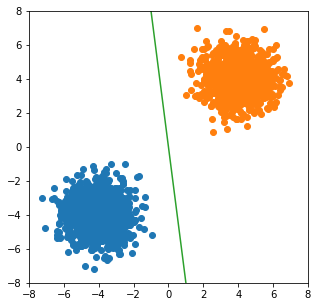

In [3]:
mu = np.array([-4,-4])
mu1 = np.array([4, 4])
cov = np.array([[1,0],[0,1]])
cov1 = np.array([[1,0],[0,1]])
case1 = Case1(mu1= mu, sigma1= cov, n1= 1000, mu2= mu1, sigma2= cov1,n2= 1000)
case1.visualize_fx()


1 Dimension detected
x= [0.5]


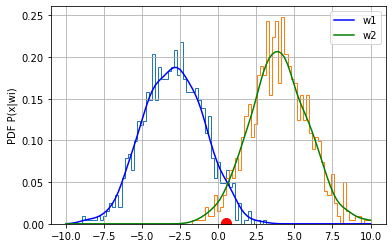

In [4]:
class Case2:
    def __init__(self,mu1,sigma1,n1,mu2,sigma2,n2):
        self.mu1 = mu1
        self.sigma1 = sigma1
        self.p1 = n1/(n1+n2)
        self.mu2 = mu2
        self.sigma2 = sigma2
        self.p2 = n2/(n1+n2)
        if(sigma1.shape[0] == 2):
            self.check = False
            self.w1 = np.random.multivariate_normal(mu1, sigma1, n1).T
            self.w2 = np.random.multivariate_normal(mu2, sigma2, n2).T
        else:
            print("1 Dimension detected")
            self.check = True
            self.w1 = np.random.normal(mu1, sigma1, 1000).T
            self.w2 = np.random.normal(mu2, sigma2, 1000).T
    # hàm cal_1D này dùng để tính case1 ở trường hợp 1 chiều
    def cal_1D(self):
        w = self.sigma1*(self.mu1 - self.mu2)
        w10 = -1/2 * self.mu1**2*self.sigma1 + np.log(self.p1)
        w20 = -1/2 * self.mu2**2*self.sigma2 + np.log(self.p2)
        x0 = 1/2*(self.mu1+self.mu2) - 1/(w*self.sigma1*w) * np.log(self.p1/self.p2) * (self.mu1 - self.mu2)
        return x0
    # hàm cal_2D này dùng để tính case1 ở trường hợp 1 chiều
    def cal_2D(self):
        w = (self.mu1 - self.mu2)
        w10 = -1/2 * np.dot(self.mu1.T,np.linalg.inv(self.sigma1)) *self.mu1 + np.log(self.p1)
        w20 = -1/2 * np.dot(self.mu2.T,np.linalg.inv(self.sigma2))*self.mu2 + np.log(self.p2)
        x0 = 1/2*(self.mu1+self.mu2) - 1/(np.dot(w,np.linalg.inv(self.sigma1))*w) * np.log(self.p1/self.p2) * (self.mu1 - self.mu2)
        return np.dot(w,np.linalg.inv(self.sigma1)), x0
    # hàm fx trả về y là 1 phương trình đường thẳng cho bài toán 2 chiều
    def fx(self,x):
        w, x0 = self.cal_2D()
        a = w.T
        b = -w.T*x0
        return a*x + b
    # hàm visualize dùng để trực quan hóa dữ liệu cho 1 chiều và vẽ điểm biên
    def visualize(self):
        if(self.check == False):
            print("2 chiều không thể dùng hàm này")
            return
        n1, X1 , _ = plt.hist(self.w1, bins=np.linspace(-10, 10, 100),
        histtype=u'step', density=True)
        n2, X2, _ = plt.hist(self.w2, bins=np.linspace(-10, 10, 100),
        histtype=u'step', density=True)
        density1 = stats.gaussian_kde(self.w1)
        density2 = stats.gaussian_kde(self.w2)
        plt.plot(X1, density1(X1),color = 'blue', label = 'w1')
        plt.plot(X2, density2(X2),color ='green',label = 'w2')
        print('x=', self.cal_1D())
        plt.scatter(self.cal_1D(),y=0.001, s= 100, marker = 'o', c = 'red')
        plt.ylabel('PDF P(x|wi)')
        plt.grid()
        plt.legend()
    # hàm visualize_fx dùng để trực quan hóa dữ liệu cho 2 chiều và vẽ đường biên
    def visualize_fx(self):
        if(self.check == True):
            print("1 chiều không thể dùng hàm này")
            return
        print("f(x) = a*x + b với a = w.T*x và b là -w.T*x0")
        x1 = np.min(np.concatenate([self.w1[0],self.w2[0]]))
        x2 = np.max(np.concatenate([self.w1[0],self.w2[0]]))
        plt.plot(self.w1[0], self.w1[1], 'o')
        plt.plot(self.w2[0], self.w2[1], 'o')
        plt.plot([x1,x2],[self.fx(x1)[0],self.fx(x2)[0]])
        plt.show()

mu = np.array([-3])
mu1 = np.array([4])
cov = np.array([2])
cov1 = np.array([2])
case2 = Case2(mu1= mu, sigma1= cov, n1= 1000, mu2= mu1, sigma2= cov1,n2= 1000)
case2.visualize()


f(x) = a*x + b với a = w.T*x và b là -w.T*x0


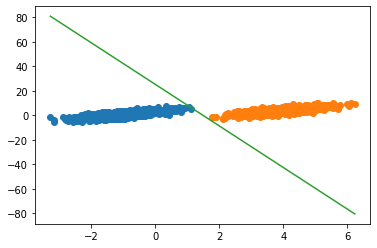

In [5]:
mu = np.array([-1,1])
mu1 = np.array([4,4])
cov = np.array([[1,3],[1,4]])
cov1 = np.array([[1,3],[1,4]])
case2 = Case2(mu1= mu, sigma1= cov, n1= 1000, mu2= mu1, sigma2= cov1,n2= 1000)
case2.visualize_fx()


# Câu 2

In [6]:
import scipy.io
import random
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


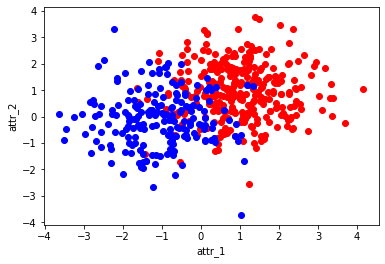

In [8]:
class_a = scipy.io.loadmat('/content/drive/MyDrive/NDM/Data/classA.mat')
class_b = scipy.io.loadmat('/content/drive/MyDrive/NDM/Data/classB.mat')
data_a = class_a['classA']
data_b = class_b['classB']
plt.scatter(data_a[:, 0], data_a[:, 1], color = 'r')
plt.scatter(data_b[:, 0], data_b[:, 1], color = 'b')
plt.xlabel('attr_1')
plt.ylabel('attr_2')
plt.show()


In [9]:
def train_test(data, train_size = 0.5):
    idx = [i for i in range(len(data))]
    random_idx = random.sample(idx, k = int(train_size*len(idx)))
    train = data[random_idx]
    test = data[list(set(idx).difference(random_idx))]
    return train, test
train_a, test_a = train_test(data_a, train_size = 0.6)
train_b, test_b = train_test(data_b, train_size = 0.6)


In [11]:
class Case2:
    def __init__(self, mu1, mu2, cov, p1, p2):
        self.mu1 = mu1
        self.mu2 = mu2
        self.cov = cov
        self.p1 = p1
        self.p2 = p2
    def calculate(self):
        mu1 = np.expand_dims(self.mu1, 1)
        mu2 = np.expand_dims(self.mu2, 1)
        cov = self.cov
        self.w1 = mu1.T@np.linalg.inv(cov)-mu2.T@np.linalg.inv(cov)
        self.w0 = - mu1.T@np.linalg.inv(cov)@mu1/2 + np.log(p1) + mu2.T@np.linalg.inv(cov)@mu2/2 - np.log(p2)             

    def get_boundary(self):
        '''
            ax + by + w0 = 0
            y = (-ax-w0)/b
        '''
        x = np.linspace(-0.1,0.1,100)
        y = []
        for i in x:
            y.append((-self.w1[0, 0]*i)/self.w0[0, 0])
        return x, y
    def predict(self, data):
        result = []
        for i in data:
            x = np.array(i).reshape(2, 1)
            g = (self.w1@x + self.w0)[0, 0]
            if g > 0:
                result.append('a')
            else:
                result.append('b')
        return result


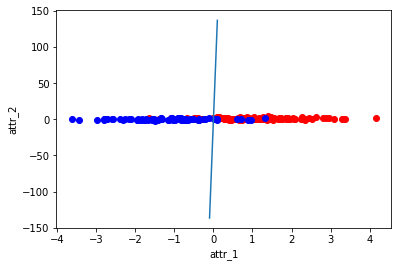

In [14]:
mean_a = np.mean(train_a, axis = 0)
mean_b = np.mean(train_b, axis = 0)
cov = np.array([[1, 0],
                [0, 1]])
sigma = 1
p1 = len(train_a)/(len(train_a)+len(train_b))
p2 = len(train_b)/(len(train_a)+len(train_b))
c = Case2(mean_a, mean_b, cov, p1, p2)
c.calculate()
label_a =['a' for i in test_a]
predict_a = c.predict(test_a)
label_b =['b' for i in test_b]
predict_b = c.predict(test_b)
point1, point2 = c.get_boundary()
plt.scatter(test_a[:, 0], test_a[:, 1], color = 'r')
plt.scatter(test_b[:, 0], test_b[:, 1], color = 'b')
plt.plot(point1, point2)
plt.xlabel('attr_1')
plt.ylabel('attr_2')
plt.show()





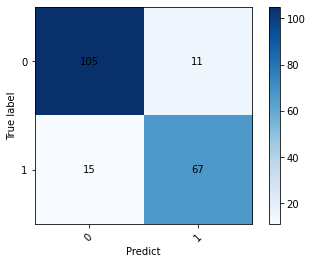

In [15]:
y_true = label_a+label_b
y_pred = predict_a+predict_b
def plot_confusion_matrix(matrix, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.imshow(matrix, cmap = plt.cm.Blues)
    tick_marks = np.arange(len(matrix))
    plt.xticks(tick_marks, rotation=45)
    plt.yticks(tick_marks)
    plt.ylabel('True label')
    plt.xlabel('Predict')
    plt.colorbar()
    for (i, j), z in np.ndenumerate(matrix):
      plt.text(i, j, z, ha='center', va='center')
cf_mt = confusion_matrix(y_true, y_pred)
plot_confusion_matrix(cf_mt)



# Câu 3

In [17]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
from scipy.stats import norm
import scipy.stats
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import scipy.io
from sklearn.model_selection import train_test_split
from numpy.linalg import inv
from numpy.linalg import det
import math

/content/drive/MyDrive/NDM/Data


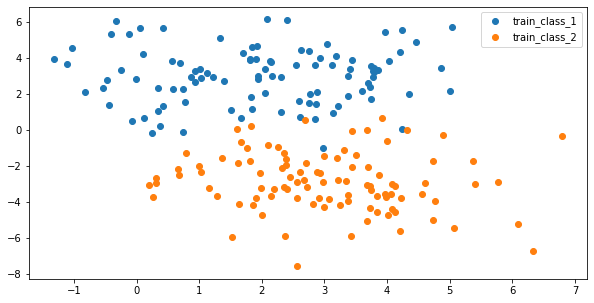

In [18]:
%cd /content/drive/MyDrive/NDM/Data
train_class_1 = scipy.io.loadmat('class1_train.mat')
train_class_2 = scipy.io.loadmat('class2_train.mat')
test_class_1 = scipy.io.loadmat('class1_test.mat')
test_class_2 = scipy.io.loadmat('class2_test.mat')
train_class_1 = train_class_1['class1_train']
train_class_2 = train_class_2['class2_train']
test_class_1 = test_class_1['class1_test']
test_class_2 = test_class_2['class2_test']
plt.figure(figsize=(10,5))
plt.scatter(train_class_1[:,0],train_class_1[:,-1],label="train_class_1")
plt.scatter(train_class_2[:,0],train_class_2[:,-1],label="train_class_2")
plt.legend()



In [ ]:
mean_class_1=train_class_1.mean(axis=0)
mean_class_2=train_class_2.mean(axis=0)
print(f'Mean class 1:\n{mean_class_1}\nMean class 2:\n{mean_class_2}')
cov1 = np.cov(train_class_1,rowvar=False)
cov2 = np.cov(train_class_2,rowvar=False)
print(f'Covariance class 1:\n{cov1}\nCovariance class 2:\n{cov2}')

pw1=size_class_1/(size_class_1+size_class_2)
pw2=size_class_2/(size_class_1+size_class_2)


In [ ]:
def giai_pt_bac_2(a,b,c):
  dis = (b**2) - (4 * a*c)
  if dis >= 0:
    ans1 = (-b-math.sqrt(dis))/(2 * a)
    ans2 = (-b + math.sqrt(dis))/(2 * a)
    return [ans1,ans2]
  else:
    return [None,None]
def case3(mu, cov, p, mu1, cov1, p1,x):
    w1 = -0.5 * inv(cov)
    w11 = inv(cov) @ mu.T
    w10 = -0.5* (mu.T @ inv(cov)) @ mu - 0.5*np.log(det(cov)) + np.log(p)
    # g1 = x.T*w1*x + w11*x + w10
    w2 = -0.5 * inv(cov1)
    w21 = inv(cov1) @ mu1
    w20 = -0.5* (mu1.T @ inv(cov1)) @ mu1 - 0.5*np.log(det(cov1)) + np.log(p1)
    # g2 = x.T*w2*x + w21*x + w20
    wi1 = w1 - w2
    wi11 = w11 - w21
    wi10 = w10 - w20
    #g1 - g2 = x.T*(w1-w2)*x + (w11-w21)*x + (w10 - w20) = 0
    a = wi1[1][1] 
    b = (x*(wi1[1][0] +wi1[1][0]) + wi11.T[1])
    c = wi1[0][0]*x**2 + x*wi11.T[0] + wi10
    y1,y2 = giai_pt_bac_2(a,b,c)
    return [y1,y2]
x = np.linspace(-2,8,100)
y_1 = np.zeros_like(x)
y_2= np.zeros_like(x)
for i,v in enumerate(x):
    y_1[i],y_2[i]=case3(mean_class_1,cov1,pw1,mean_class_2,cov2,pw2,v)
plt.figure(figsize=(10,5))
plt.scatter(train_class_1[:,0],train_class_1[:,-1],label='train_class_1')
plt.scatter(train_class_2[:,0],train_class_2[:,-1],label='train_class_2')
plt.plot(x, y_1)
plt.plot(x, y_2,c = 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
plt.ylim(-10,10)


In [ ]:
def phanlop_Case3(mu,cov,p,mu1,cov1,p1,x):
      w1 = -0.5 * inv(cov)
      w11 = inv(cov) @ mu.T
      w10 = -0.5* (mu.T @ inv(cov)) @ mu - 0.5*np.log(det(cov)) + np.log(p)
      # g1 = x.T*w1*x + w11*x + w10
      w2 = -0.5 * inv(cov1)
      w21 = inv(cov1) @ mu1
      w20 = -0.5* (mu1.T @ inv(cov1)) @ mu1 - 0.5*np.log(det(cov1)) + np.log(p1)
      # g2 = x.T*w2*x + w21*x + w20
      wi1 = w1 - w2
      wi11 = w11 - w21
      wi10 = w10 - w20
      # if g1 - g2 > 0 return true : return false
      return x.T @ wi1 @ x + wi11 @ x + wi10 > 0 
pre_class_1,pre_class_2=[],[]
for i in test_class_1:
  pre_class_1.append(phanlop_Case3(mean_class_1,cov1,pw1,mean_class_2,cov2,pw2,i))
for i in test_class_2:
  pre_class_2.append(phanlop_Case3(mean_class_1,cov1,pw1,mean_class_2,cov2,pw2,i))
true_class_1 = [True]*len(pre_class_1)
true_class_2 = [False]*len(pre_class_2)
cf_mt = confusion_matrix(pre_class_1+pre_class_2, true_class_1+true_class_2)
plot_confusion_matrix(cf_mt)

